
Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.

Epoch 1/20


1253/1253 [==============================] - 374s 298ms/step - loss: 1.8883 - accuracy: 0.3221 - val_loss: 1.7814 - val_accuracy: 0.3711
Epoch 2/20
1253/1253 [==============================] - 22s 18ms/step - loss: 1.7005 - accuracy: 0.3928 - val_loss: 1.6806 - val_accuracy: 0.3972
Epoch 3/20
1253/1253 [==============================] - 21s 17ms/step - loss: 1.6173 - accuracy: 0.4238 - val_loss: 1.5928 - val_accuracy: 0.4339
Epoch 4/20
1253/1253 [==============================] - 22s 17ms/step - loss: 1.5583 - accuracy: 0.4480 - val_loss: 1.5588 - val_accuracy: 0.4441
Epoch 5/20
1253/1253 [==============================] - 22s 17ms/step - loss: 1.5125 - accuracy: 0.4627 - val_loss: 1.5583 - val_accuracy: 0.4456
Epoch 6/20
1253/1253 [==============================] - 22s 17ms/step - loss: 1.4664 - accuracy: 0.4767 - val_loss: 1.4916 - val_accuracy: 0.4692
Epoch 7/20
1253/1253 [=========

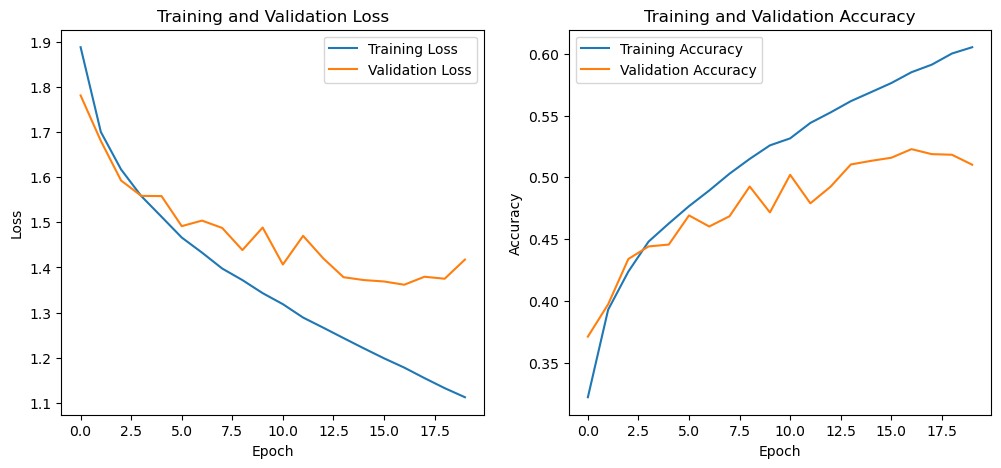

In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# b. Load the training and testing data
train_dir = r'C:\Users\ameyp\DL in AI Lab\Modified\cifar-10-img\train'
test_dir = r'C:\Users\ameyp\DL in AI Lab\Modified\cifar-10-img\test'

# Image data generator for rescaling and loading data
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# c. Define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),        # Flatten 32x32x3 images
    Dense(512, activation='relu'),           # First hidden layer
    Dense(256, activation='relu'),           # Second hidden layer
    Dense(128, activation='relu'),           # Third hidden layer
    Dense(10, activation='softmax')          # Output layer for 10 classes (0-9)
])

# d. Train the model using SGD
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# f. Plot the training loss and accuracy
# Plotting training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [4]:
# Import necessary functions
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the new image
new_img_path = r'C:\Users\ameyp\DL in AI Lab\Modified\cifar-10-img\test\cat\10018.png'  # Specify the path of the new image

# Load the image, resize to (32, 32), and convert to array
img = load_img(new_img_path, target_size=(32, 32))  # Resize the image to 32x32
img_array = img_to_array(img)  # Convert the image to a numpy array
img_array = img_array / 255.0  # Rescale the image as done during training
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Print the predicted class index to check if it's correct
print(f"Predicted class index: {predicted_class}")

# Get the class label (assuming class labels are integers from 0 to 9)
class_labels = train_generator.class_indices  # Get the class indices from the training data
class_labels = {v: k for k, v in class_labels.items()}  # Invert the dictionary to map integer to label

# Print the actual label prediction
predicted_class_label = class_labels[predicted_class]
print(f"Predicted class for the image: {predicted_class_label}")


1/1 [==============================] - 0s 28ms/step
Predicted class index: 3
Predicted class for the image: cat
